In [199]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.tri as tri
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
from statsmodels.base.model import GenericLikelihoodModel
%matplotlib inline

In [200]:
pklfile = '../learn/pkl_trainsets/19aug2019_opusupdate/mlecompare_not-scaled_15nuc.pkl'
XY = pd.read_pickle(pklfile)
XY.reset_index(inplace=True, drop=True)
if 'total' in XY.columns:
    XY.drop('total', axis=1, inplace=True)
lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
XY.head()

,Burnup,CoolingTime,Enrichment,OrigenReactor,ReactorType,ba136,ba138,cs133,cs134,cs135,cs137,eu153,eu154,pu239,pu240,pu241,pu242,sm149,sm150,sm152
0,0.00,0.000000,0.5,ce14x14,pwr,0.000000,0.0000,0.0000,0.000000,0.0000,0.0000,0.00000,0.000000,0.000,0.0000,0.000000,0.000000,0.000000,0.00000,0.00000
1,1953.74,0.000671,0.5,ce14x14,pwr,0.000566,0.5950,0.4983,0.002255,0.1154,0.5477,0.01501,0.000425,2.491,0.1128,0.006293,0.000108,0.008119,0.08426,0.04072
2,1953.74,0.408683,0.5,ce14x14,pwr,0.000571,0.5954,0.5025,0.002256,0.1168,0.5477,0.01513,0.000425,2.512,0.1128,0.006293,0.000108,0.008801,0.08426,0.04073
3,1953.74,0.797730,0.5,ce14x14,pwr,0.000575,0.5954,0.5065,0.002255,0.1182,0.5477,0.01524,0.000425,2.529,0.1128,0.006292,0.000108,0.009381,0.08426,0.04073
4,1953.74,7.566936,0.5,ce14x14,pwr,0.000644,0.5954,0.5560,0.002241,0.1204,0.5475,0.01586,0.000425,2.655,0.1128,0.006287,0.000108,0.013310,0.08426,0.04073


### Replace nuclide concentrations with ratios

- cs137/cs133
- cs134/cs137
- cs135/cs137
- ba136/ba138
- sm150/sm149
- sm152/sm149
- eu154/eu153
- pu240/pu239
- pu241/pu239
- pu242/pu239

In [201]:
ratios = XY.loc[:, lbls].copy()

In [202]:
#cs137/cs133
ratios['cs137/cs133'] = XY['cs137'] / XY['cs133']
#cs134/cs137
ratios['cs134/cs137'] = XY['cs134'] / XY['cs137']
#cs135/cs137
ratios['cs135/cs137'] = XY['cs135'] / XY['cs137']
#ba136/ba138
ratios['ba136/ba138'] = XY['ba136'] / XY['ba138']
#sm150/sm149
ratios['sm150/sm149'] = XY['sm150'] / XY['sm149']
#sm152/sm149
ratios['sm152/sm149'] = XY['sm152'] / XY['sm149']
#eu154/eu153
ratios['eu154/eu153'] = XY['eu154'] / XY['eu153']
#pu240/pu239
ratios['pu240/pu239'] = XY['pu240'] / XY['pu239']
#pu241/pu239
ratios['pu241/pu239'] = XY['pu241'] / XY['pu239']
#pu242/pu239
ratios['pu242/pu239'] = XY['pu242'] / XY['pu239']

ratios.replace([np.inf, -np.inf], 0, inplace=True)
ratios.fillna(0, inplace = True)
ratios

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
0,pwr,0.000000,0.500,0.00,ce14x14,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,pwr,0.000671,0.500,1953.74,ce14x14,1.099137,0.004117,0.210699,0.000951,10.378125,5.015396,0.028341,0.045283,0.002526,0.000044
2,pwr,0.408683,0.500,1953.74,ce14x14,1.089950,0.004119,0.213255,0.000959,9.573912,4.627883,0.028116,0.044904,0.002505,0.000043
3,pwr,0.797730,0.500,1953.74,ce14x14,1.081343,0.004117,0.215812,0.000966,8.981985,4.341755,0.027907,0.044603,0.002488,0.000043
4,pwr,7.566936,0.500,1953.74,ce14x14,0.984712,0.004093,0.219909,0.001082,6.330579,3.060105,0.026778,0.042486,0.002368,0.000041
5,pwr,21.630425,0.500,1953.74,ce14x14,0.933447,0.004044,0.220110,0.001223,6.088150,2.942919,0.026595,0.042168,0.002346,0.000041
6,pwr,290.048730,0.500,1953.74,ce14x14,0.909060,0.003215,0.223875,0.001352,6.083755,2.940794,0.025063,0.042168,0.002264,0.000041
7,pwr,1847.008459,0.500,1953.74,ce14x14,0.824037,0.000848,0.246974,0.001352,6.083755,2.940794,0.017776,0.042131,0.001841,0.000041
8,pwr,3590.212220,0.500,1953.74,ce14x14,0.738168,0.000191,0.275704,0.001352,6.083755,2.940794,0.012104,0.042131,0.001461,0.000041
9,pwr,0.000000,0.500,1953.74,ce14x14,1.099137,0.004117,0.210699,0.000951,10.379404,5.016014,0.028341,0.045283,0.002526,0.000044


In [221]:
### filter trainXY ###
trainXY = ratios.loc[(ratios['Burnup'] > 0) & (ratios['Burnup'] < 10000)].copy() #Need to explicitly tell pandas not to worry that I'm making a copy
trainXY = trainXY.loc[].copy()
trainXY = trainXY.sample(frac=1)

In [222]:
def splitXY(dfXY):
    lbls = ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']
    dfX = dfXY.drop(lbls, axis=1)
    r_dfY = dfXY.loc[:, lbls[0]]
    c_dfY = dfXY.loc[:, lbls[1]]
    e_dfY = dfXY.loc[:, lbls[2]]
    b_dfY = dfXY.loc[:, lbls[3]]
    o_dfY = dfXY.loc[:, lbls[4]]
    return dfX, r_dfY, c_dfY, e_dfY, b_dfY, o_dfY

X, rY, cY, eY, bY, oY = splitXY(trainXY)

In [223]:
trainXY.sample(10)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
3312,agr,0.000766,4.840,9676.03,agr,0.945617,0.030083,0.514567,0.006430,49.431051,24.599807,0.100000,0.244492,0.122144,1.505737e-02
3735,phwr,3327.091018,0.711,478.07,candu37,0.749313,0.000025,0.400458,0.000922,1.427694,0.745186,0.002857,0.008063,0.000051,3.105822e-07
1469,pwr,1.052600,2.070,5787.83,vver1000,0.982916,0.018641,0.239975,0.002696,24.260652,12.623225,0.074933,0.126250,0.032502,1.772333e-03
2651,agr,0.000000,1.950,7840.31,agr,0.939130,0.018685,0.458333,0.004188,48.223166,25.712553,0.075927,0.245105,0.069070,6.943390e-03
3612,phwr,1.166064,0.711,7217.82,candu19,0.946328,0.011040,0.289801,0.002225,46.252621,26.965409,0.072393,0.127460,0.015485,1.005112e-03
1119,pwr,424.770214,0.500,8830.20,vver1000,0.914122,0.015265,0.215908,0.003318,30.194110,16.633199,0.077863,0.193062,0.044978,4.355727e-03
3804,phwr,29.049973,0.711,3860.63,candu37,0.924528,0.005865,0.302876,0.001676,17.296015,9.360531,0.044170,0.072896,0.005494,1.840979e-04
3760,phwr,389.377056,0.711,1952.29,candu37,0.902600,0.002001,0.316439,0.001267,8.387222,4.070668,0.022459,0.035579,0.001297,2.172308e-05
3098,agr,6.750839,3.950,9676.03,agr,0.936947,0.028019,0.500189,0.006108,43.319149,21.940426,0.095022,0.255331,0.117988,1.490432e-02
3761,phwr,2480.835315,0.711,1952.29,candu37,0.791020,0.000334,0.361076,0.001267,8.387222,4.070668,0.014160,0.035559,0.000983,2.172308e-05


# ML Calculation
## Likelihoods of each observation calculated for a single comparison

In [259]:
### If random filtering: make sure sample isn't in training set ###
sim_idx = 3050
test_exist = trainXY.loc[trainXY.index == sim_idx]
test_exist

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239,LogLikelihood,LLUncertainty
3050,agr,0.000766,3.95,2984.46,agr,0.960532,0.009736,0.490903,0.002376,14.904299,6.867482,0.046744,0.095966,0.014979,0.000496,34.487309,0.0


In [260]:
test_sample = ratios.loc[ratios.index == sim_idx].drop(lbls, axis=1)
test_answer = ratios.loc[ratios.index == sim_idx, lbls]
test_answer
test_sample

,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
3050,0.960532,0.009736,0.490903,0.002376,14.904299,6.867482,0.046744,0.095966,0.014979,0.000496


In [283]:
def ll_calc(y_sim, y_mes, std):
    ll = np.sum(stats.norm.logpdf(y_sim, loc=y_mes, scale=std))
    return ll

def unc_calc(y_sim, y_mes, sim_unc_sq, mes_unc_sq):
    unc = ((y_sim - y_mes) / sim_unc_sq)**2 * (sim_unc_sq + mes_unc_sq)
    unc.replace([np.inf, -np.inf], 0, inplace=True)
    unc.fillna(0, inplace = True)
    return np.sqrt(unc.sum(axis=1))

In [284]:
row_unc = 0.14
test_unc = 0.14
trainXY['LogLikelihood'] = X.apply(lambda row: ll_calc(row, test_sample.iloc[0], row_unc*row), axis=1)
#############################################################################
# pandas converts each row to a series, so using .iloc[0] on the single-row #
# dataframe that is test_sample allows the function to work properly        #
#############################################################################

In [285]:
trainXY['LLUncertainty'] = X.apply(lambda row: unc_calc(row, test_sample.iloc[0], (row_unc*row)**2, (test_unc*test_sample)**2), axis=1)

In [286]:
trainXY.sample(10)

,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239,LogLikelihood,LLUncertainty
3046,agr,443.515606,3.950,1524.98,agr,0.897225,0.003427,0.505558,0.001782,5.848725,2.492524,0.024270,0.049741,0.003848,0.000068,-1468.050290,351.599304
189,pwr,3590.212220,1.550,1953.74,ce14x14,0.737636,0.000245,0.293915,0.001511,5.751193,2.740286,0.013576,0.044041,0.002213,0.000062,-40798.493453,11052.112544
3771,phwr,3327.091018,0.711,2236.89,candu37,0.749963,0.000190,0.379398,0.001333,9.184982,4.578755,0.013280,0.040902,0.001160,0.000033,-73504.439387,18583.538007
1661,pwr,25.378664,3.010,8830.20,vver1000,0.946187,0.031268,0.259861,0.004536,24.471757,12.395397,0.101538,0.165784,0.074172,0.006389,-69.127211,18.897218
9,pwr,0.000000,0.500,1953.74,ce14x14,1.099137,0.004117,0.210699,0.000951,10.379404,5.016014,0.028341,0.045283,0.002526,0.000044,-3529.122728,875.486725
2825,agr,0.368248,2.960,1524.98,agr,0.992779,0.004437,0.474191,0.001389,7.415580,3.168394,0.025599,0.051368,0.003705,0.000061,-1618.693099,423.356843
3514,phwr,8.080022,0.711,2302.72,candu19,0.949713,0.003109,0.306239,0.001152,9.990366,5.053950,0.027891,0.037122,0.001451,0.000026,-10862.696950,2594.473999
2649,agr,1715.776776,1.950,7840.31,agr,0.830334,0.004304,0.511971,0.004389,37.794677,20.152091,0.051613,0.242306,0.054406,0.006870,-83.121860,25.610155
2189,agr,3392.475644,0.500,2984.46,agr,0.744610,0.000302,0.537194,0.001864,14.699098,7.170266,0.016599,0.091880,0.003962,0.000199,-25269.411176,7219.005958
3881,phwr,0.000802,0.711,8027.96,candu37,0.948151,0.013286,0.289467,0.002562,56.480821,32.796236,0.077417,0.161623,0.025021,0.001988,-40.916644,15.124894


### Max LL: Reactor-dependent (paper presents it this way)

#### PWR

In [287]:
max_pwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'pwr'].max()
idx_pwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'pwr'].idxmax()
unc_pwr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_pwr])
print(f'Max Log Likelihood for PWRs: {max_pwr} +/- {unc_pwr}')
trainXY.loc[trainXY.index == idx_pwr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for PWRs: 11.048499695190444 +/- 12.766491710709374


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
1821,pwr,0.64499,4.09,3686.66,vver1000


#### AGR

In [288]:
max_agr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'agr'].max()
idx_agr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'agr'].idxmax()
unc_agr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_agr])
print(f'Max Log Likelihood for AGRs: {max_agr} +/- {unc_agr}')
trainXY.loc[trainXY.index == idx_agr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for AGRs: 35.5569929407605 +/- 0.36202511355841327


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
3051,agr,0.368248,3.95,2984.46,agr


#### PHWR

In [289]:
max_phwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'phwr'].max()
idx_phwr = trainXY['LogLikelihood'].loc[trainXY['ReactorType'] == 'phwr'].idxmax()
unc_phwr = float(trainXY['LLUncertainty'].loc[trainXY.index == idx_phwr])
print(f'Max Log Likelihood for PHWRs: {max_phwr} +/- {unc_phwr}')
trainXY.loc[trainXY.index == idx_phwr, ['ReactorType', 'CoolingTime', 'Enrichment', 'Burnup', 'OrigenReactor']]

Max Log Likelihood for PHWRs: 6.391212637195849 +/- 12.141313924933009


,ReactorType,CoolingTime,Enrichment,Burnup,OrigenReactor
3831,phwr,29.049973,0.711,5272.11,candu37


## LL wrt Burnup and Cool Time

In [290]:
min_ll = trainXY['LogLikelihood'].min()
max_ll = trainXY['LogLikelihood'].max()
min_ll, max_ll

(-145549023.41006902, 35.5569929407605)

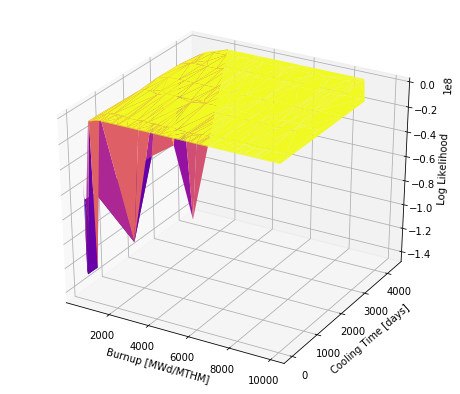

In [291]:
x = trainXY['Burnup']
y = trainXY['CoolingTime']
triang = tri.Triangulation(x, y)
z = trainXY['LogLikelihood']

fig = plt.figure(figsize=(8, 7))
ax = fig.gca(projection='3d')
ax.plot_trisurf(triang, z, linewidth=0.1, cmap=plt.cm.plasma)
ax.set_xlabel('Burnup [MWd/MTHM]')
ax.set_ylabel('Cooling Time [days]')
ax.set_zlabel('Log Likelihood')
plt.show()

# ML Estimation
## Coefficients of linear models estimated
This example is done with dependent variable = burnup

In [235]:
class NormMod(GenericLikelihoodModel):
    def __init__(self, endog, exog, **kwds):
        super(NormMod, self).__init__(endog, exog, **kwds)
    
    def nloglikeobs(self, params):
        beta = params
        yhat = np.dot(self.exog, beta)
        LL = stats.norm.logpdf(self.endog, loc=yhat)
        return -LL
    
    def fit(self, start_params=None, maxiter=100000, maxfun=100000, **kwds):
        if start_params == None:
            start_params = np.zeros(self.exog.shape[1])
            start_params[0] = np.log(self.endog.mean())
        return super(NormMod, self).fit(start_params=start_params,
                                        maxiter=maxiter, maxfun=maxfun,
                                        **kwds)
    
    def predict(self, nuc_list):
        
        return burn

In [236]:
y = bY
X = sm.add_constant(X)

/home/opotowsky/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [243]:
X.shape

(1197, 11)

In [244]:
X

,const,cs137/cs133,cs134/cs137,cs135/cs137,ba136/ba138,sm150/sm149,sm152/sm149,eu154/eu153,pu240/pu239,pu241/pu239,pu242/pu239
3522,1.0,0.978574,0.003804,0.303402,0.001192,13.984524,7.309633,0.033149,0.045215,0.002106,4.500825e-05
3308,1.0,0.907422,0.019220,0.529089,0.006274,37.040253,18.476717,0.086386,0.228622,0.100228,1.185139e-02
3763,1.0,1.014251,0.002790,0.302920,0.001024,12.289362,5.964539,0.025276,0.037048,0.001422,2.261612e-05
2648,1.0,0.899743,0.012786,0.472476,0.004389,37.794677,20.152091,0.068336,0.242270,0.064410,6.868808e-03
2440,1.0,0.899207,0.013367,0.459698,0.004549,45.274725,24.595405,0.070794,0.279721,0.073891,9.285173e-03
3507,1.0,0.903071,0.001534,0.316696,0.001154,6.207048,3.022907,0.018721,0.025849,0.000695,9.176319e-06
2832,1.0,0.996027,0.004437,0.472548,0.001384,7.608919,3.251001,0.025682,0.051544,0.003717,6.153516e-05
3475,1.0,1.401221,0.000398,0.300295,0.000505,2.038950,1.087489,0.006549,0.008323,0.000071,2.609774e-07
3581,1.0,0.716770,0.000250,0.382149,0.001956,23.703704,13.518519,0.023447,0.090497,0.004777,3.687329e-04
3519,1.0,0.999691,0.003129,0.301145,0.001077,14.095419,7.130624,0.028677,0.038297,0.001500,2.662427e-05


In [238]:
mod = NormMod(y, X)

In [239]:
res = mod.fit()
print(res.summary())

Optimization terminated successfully.
         Current function value: 711095.760322
         Iterations: 1873
         Function evaluations: 2735
                               NormMod Results                                
Dep. Variable:                 Burnup   Log-Likelihood:            -8.5118e+08
Model:                        NormMod   AIC:                         1.702e+09
Method:            Maximum Likelihood   BIC:                         1.702e+09
Date:                Wed, 21 Aug 2019                                         
Time:                        14:53:02                                         
No. Observations:                1197                                         
Df Residuals:                    1186                                         
Df Model:                          10                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------

In [255]:
res.params

array([ 719.87364173,  372.1537983 ,  131.04135695,   55.25179493,
        170.74371014,  425.69821348, -482.04606861,  -54.12044023,
        -21.9820938 , -443.23251029, -324.78268586])

In [ ]:
test_sample.insert(0, 'const', 1.0)

In [273]:
burn_pred = np.sum(test_sample.iloc[0] * res.params)
burn_pred, test_answer['Burnup']

(4128.9950318271685, 3050    2984.46
 Name: Burnup, dtype: float64)